<h1> Assignment 6: Regression </h1>
<section> Cheng FEI (cf482) </section>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Import data and merge two datasets based on Geo_FIPS.
acs_data = pd.read_excel('/Users/chengfei/Desktop/CRP 5850 小老师Special Topics -- Introduction to Urban Data Science/0-Lectures/Week 8/ACS.xlsx')
health_data = pd.read_csv('/Users/chengfei/Desktop/CRP 5850 小老师Special Topics -- Introduction to Urban Data Science/0-Lectures/Week 8/Health data.csv')
data = pd.merge(acs_data, health_data, on='Geo_FIPS')
data.index = data.Geo_FIPS

In [4]:
# Delete entries of which 'Metro status' is np.nan.
index_list = list(data['Metro status'].dropna().index)
data = data[[index in index_list for index in list(data.index)]]

In [5]:
# Initialize the regression results dataframe.
variables_list = ['VariablesSet1', 'VariablesSet2', 'VariablesSet3']
models_list = ['SimpleLinearRegression', 'MultipleLinearRegression', 'PolynomialRegression', 'SVR_linear', 'SVR_poly', 'SVR_rbf', 'DecisionTree', 'RandomForest']
index_list = []
for i in range(len(variables_list)):
    for j in range(len(models_list)):
        index_list.append((variables_list[i], models_list[j]))
multilevel_index = pd.MultiIndex.from_tuples(index_list)

columns = ['X', 'Y', 'R2 (train set)', 'R2 (test set)', 'x_trial', 'y_actual', 'y_predicted']

reg_results = pd.DataFrame(index=multilevel_index, columns=columns)

In [6]:
# Select Physically Unhealthy Days per Month as the variable Y.
y = data.T001_001.values

<h1> 1. The first set of explanatory variables X: </h1> 
<ul> 
    <li> NV003_001--Primary Care Physicians (PCP) Rate per 100,000 Population. </li>
</ul>

In [7]:
# The first set of variables X: NV003_001--Primary Care Physicians (PCP) Rate per 100,000 Population.
x1 = data.NV003_001.values.reshape(-1,1)

In [8]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=1)

In [9]:
imx1 = SimpleImputer(missing_values=np.nan, strategy='mean')
x1_train = imx1.fit_transform(x1_train)
x1_test = imx1.transform(x1_test)

In [10]:
imy1 = SimpleImputer(missing_values=np.nan, strategy='mean')
y1_train = imy1.fit_transform(y1_train.reshape(-1,1))
y1_test = imy1.transform(y1_test.reshape(-1,1))

<h3> 1.1. Simple Linear Regression </h3>

In [11]:
regressor1 = LinearRegression()

In [12]:
regressor1.fit(x1_train, y1_train)

LinearRegression()

In [13]:
print(regressor1.score(x1_train, y1_train))

0.057009604219045884


In [14]:
print(regressor1.score(x1_test, y1_test))

0.030111340777911


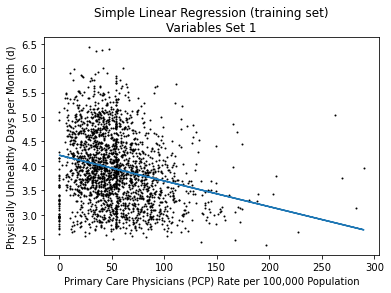

In [50]:
plt.scatter(x1_train, y1_train, color='k', s=1)
plt.plot(x1_train, regressor1.predict(x1_train))
plt.title('Simple Linear Regression (training set)\nVariables Set 1')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (training set)_Variables Set 1.pdf')

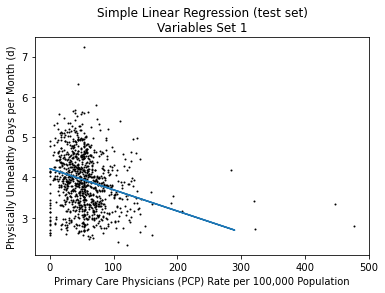

In [51]:
plt.scatter(x1_test, y1_test, color='k', s=1)
plt.plot(x1_train, regressor1.predict(x1_train))
plt.title('Simple Linear Regression (test set)\nVariables Set 1')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (test set)_Variables Set 1.pdf')

In [17]:
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'R2 (train set)'] = regressor1.score(x1_train, y1_train)
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'R2 (test set)'] = regressor1.score(x1_test, y1_test)
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'SimpleLinearRegression'), 'y_predicted'] = regressor1.predict([[41.50426]])[0][0]

<h3> 1.2. Multiple Linear Regression </h3>
<section> *Not Applicable in this case* </section>

In [18]:
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'R2 (train set)'] = np.nan
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'R2 (test set)'] = np.nan
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'MultipleLinearRegression'), 'y_predicted'] = np.nan

<h3> 1.3. Polynomial Regression </h3>

In [19]:
poly_reg1 = PolynomialFeatures(degree=3)
x1_poly_train = poly_reg1.fit_transform(x1_train)
x1_poly_test = poly_reg1.transform(x1_test)

In [20]:
regressor1_poly = LinearRegression()
regressor1_poly.fit(x1_poly_train, y1_train)

LinearRegression()

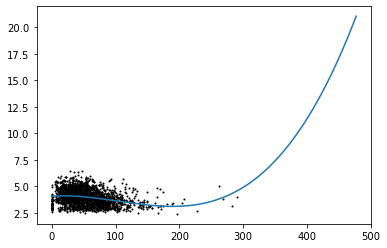

In [22]:
plt.scatter(x1_train, y1_train, color='k', s=1)
x1_grid = np.arange(min(x1), max(x1), 0.1).reshape(-1,1)
plt.plot(x1_grid, regressor1_poly.predict(poly_reg1.fit_transform(x1_grid)))

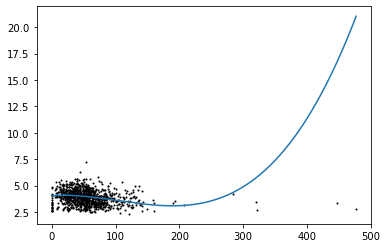

In [23]:
plt.scatter(x1_test, y1_test, color='k', s=1)
x1_grid = np.arange(min(x1), max(x1), 0.1).reshape(-1,1)
plt.plot(x1_grid, regressor1_poly.predict(poly_reg1.fit_transform(x1_grid)))

In [24]:
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'R2 (train set)'] = regressor1_poly.score(x1_poly_train, y1_train)
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'R2 (test set)'] = regressor1_poly.score(x1_poly_test, y1_test)
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'PolynomialRegression'), 'y_predicted'] = regressor1_poly.predict(poly_reg1.transform([[41.50426]]))[0][0]

<h3> 1.4. Support Vector Regression </h3>

In [25]:
scx1 = StandardScaler()
x1_sc_train = scx1.fit_transform(x1_train)
x1_sc_test = scx1.transform(x1_test)
scy1 = StandardScaler()
y1_sc_train = scy1.fit_transform(y1_train)
y1_sc_test = scy1.transform(y1_test)

<h5> 1.4.1. Use linear as the kernel. </h5>

In [26]:
regressor1_svm_linear = SVR(kernel='linear')
regressor1_svm_linear.fit(x1_sc_train, y1_sc_train.ravel())

SVR(kernel='linear')

In [27]:
print(regressor1_svm_linear.score(x1_sc_train, y1_sc_train))

0.04910352979489652


In [28]:
print(regressor1_svm_linear.score(x1_sc_test, y1_sc_test))

0.021092970778920583


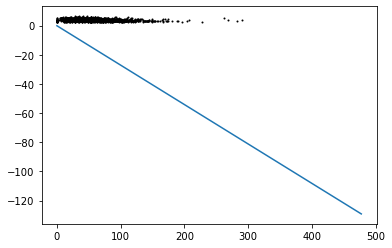

In [29]:
plt.scatter(x1_train, y1_train, color='k', s=1)
x_grid = np.arange(min(x1), max(x1), 0.1)
plt.plot(x_grid, regressor1_svm_linear.predict(x_grid.reshape(-1,1)))

In [30]:
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'R2 (train set)'] = regressor1_svm_linear.score(x1_sc_train, y1_sc_train)
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'R2 (test set)'] = regressor1_svm_linear.score(x1_sc_test, y1_sc_test)
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'SVR_linear'), 'y_predicted'] = scy1.inverse_transform([regressor1_svm_linear.predict(scx1.transform([[41.50426]]))[0]])[0]

<h5> 1.4.2. Use poly as the kernel. </h5>

In [31]:
regressor1_svm_poly = SVR(kernel='poly')
regressor1_svm_poly.fit(x1_sc_train, y1_sc_train.ravel())

SVR(kernel='poly')

In [32]:
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'R2 (train set)'] = regressor1_svm_poly.score(x1_sc_train, y1_sc_train)
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'R2 (test set)'] = regressor1_svm_poly.score(x1_sc_test, y1_sc_test)
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'SVR_poly'), 'y_predicted'] = scy1.inverse_transform([regressor1_svm_poly.predict(scx1.transform([[41.50426]]))[0]])[0]

<h5> Use rbf as the kernel. </h5>

In [33]:
regressor1_svm_rbf = SVR(kernel='rbf')
regressor1_svm_rbf.fit(x1_sc_train, y1_sc_train.ravel())

SVR()

In [34]:
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'R2 (train set)'] = regressor1_svm_rbf.score(x1_sc_train, y1_sc_train)
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'R2 (test set)'] = regressor1_svm_rbf.score(x1_sc_test, y1_sc_test)
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'SVR_rbf'), 'y_predicted'] = scy1.inverse_transform([regressor1_svm_rbf.predict(scx1.transform([[41.50426]]))[0]])[0]

<h3> 1.5. Decision Tree Regression </h3>

In [35]:
regressor1_tree = DecisionTreeRegressor(random_state=0)
regressor1_tree.fit(x1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [36]:
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'R2 (train set)'] = regressor1_tree.score(x1_train, y1_train)
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'R2 (test set)'] = regressor1_tree.score(x1_test, y1_test)
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'DecisionTree'), 'y_predicted'] = regressor1_tree.predict([[41.50426]])[0]

<h3> 1.6. Random Forest Regression </h3>

In [37]:
regressor1_forest = RandomForestRegressor(n_estimators=10, random_state=0)
regressor1_forest.fit(x1_train, y1_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [38]:
reg_results.loc[('VariablesSet1', 'RandomForest'), 'X'] = 'NV003_001'
reg_results.loc[('VariablesSet1', 'RandomForest'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet1', 'RandomForest'), 'R2 (train set)'] = regressor1_forest.score(x1_train, y1_train)
reg_results.loc[('VariablesSet1', 'RandomForest'), 'R2 (test set)'] = regressor1_forest.score(x1_test, y1_test)
reg_results.loc[('VariablesSet1', 'RandomForest'), 'x_trial'] = 41.50426
reg_results.loc[('VariablesSet1', 'RandomForest'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet1', 'RandomForest'), 'y_predicted'] = regressor1_forest.predict([[41.50426]])[0]

<h1> 2. The second set of explanatory variables X: </h1> 
<ul> 
    <li> NV003_001--Primary Care Physicians (PCP) Rate per 100,000 Population. </li>
    <li> Metro status--Metro status, if the county is metro core, suburb, micro core, or remote rural Metro core: county within metropolitan areas with at least one principal city Suburb: other counties within metropolitan area
Micro core: counties with micropolitan areas with at least one principal city Remote rural: other counties. </li>
</ul>

In [39]:
x2 = data[['NV003_001', 'Metro status']].values

In [40]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=0)

In [41]:
imx2_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
x2_train[:,[0]] = imx2_1.fit_transform(x2_train[:,[0]].reshape(-1,1))
x2_test[:,[0]] = imx2_1.transform(x2_test[:,[0]].reshape(-1,1))

imy2 = SimpleImputer(missing_values=np.nan, strategy='mean')
y2_train = imy2.fit_transform(y2_train.reshape(-1,1))
y2_test = imy2.transform(y2_test.reshape(-1,1))

In [42]:
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x2_train = np.array(ct2.fit_transform(x2_train))
x2_test = np.array(ct2.transform(x2_test))

<h3> 2.1. Simple Linear Regression </h3>
<section> *Not Applicable in this case* </section>

In [43]:
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'R2 (train set)'] = np.nan
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'R2 (test set)'] = np.nan
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet2', 'SimpleLinearRegression'), 'y_predicted'] = np.nan

<h3> 2.2. Multiple Linear Regression </h3>

In [44]:
regressor2 = LinearRegression()
regressor2.fit(x2_train, y2_train)

LinearRegression()

In [45]:
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'R2 (train set)'] = regressor2.score(x2_train, y2_train)
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'R2 (test set)'] = regressor2.score(x2_test, y2_test)
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'y_actual'] = 4.20057798
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
reg_results.loc[('VariablesSet2', 'MultipleLinearRegression'), 'y_predicted'] = regressor2.predict(x2_trial)[0,0]

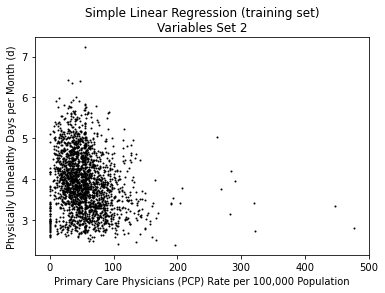

In [53]:
plt.scatter(x2_train[:,-1], y2_train, color='k', s=1)
plt.title('Simple Linear Regression (training set)\nVariables Set 2')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (training set)_Variables Set 2.pdf')

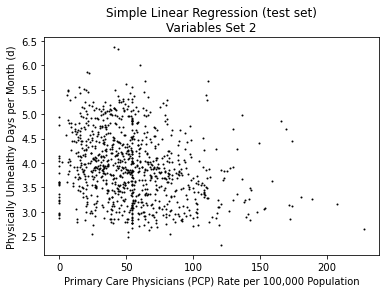

In [54]:
plt.scatter(x2_test[:,-1], y2_test, color='k', s=1)
plt.title('Simple Linear Regression (test set)\nVariables Set 2')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (test set)_Variables Set 2.pdf')

<h3> 2.3. Polynomial Regression </h3>

In [55]:
poly_reg2 = PolynomialFeatures(degree=3)
x2_poly_train = poly_reg2.fit_transform(x2_train)
x2_poly_test = poly_reg2.transform(x2_test)

In [56]:
regressor2_poly = LinearRegression()
regressor2_poly.fit(x2_poly_train, y2_train.ravel())

LinearRegression()

In [57]:
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'R2 (train set)'] = regressor2_poly.score(x2_poly_train, y2_train)
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'R2 (test set)'] = regressor2_poly.score(x2_poly_test, y2_test)
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
x2_poly_trial = poly_reg2.transform(x2_trial)
reg_results.loc[('VariablesSet2', 'PolynomialRegression'), 'y_predicted'] = regressor2_poly.predict(x2_poly_trial)[0]

<h3> 2.4. Support Vector Regression </h3>

In [58]:
scx2 = StandardScaler()
x2_sc_train = scx2.fit_transform(x2_train)
x2_sc_test = scx2.transform(x2_test)
scy2 = StandardScaler()
y2_sc_train = scy2.fit_transform(y2_train)
y2_sc_test = scy2.transform(y2_test)

<h5> 2.4.1. Use linear as the kernel. </h5>

In [59]:
regressor2_svm_linear = SVR(kernel='linear')
regressor2_svm_linear.fit(x2_sc_train, y2_sc_train.ravel())

SVR(kernel='linear')

In [60]:
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'R2 (train set)'] = regressor2_svm_linear.score(x2_sc_train, y2_sc_train)
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'R2 (test set)'] = regressor2_svm_linear.score(x2_sc_test, y2_sc_test)
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
x2_sc_trial = scx2.transform(x2_trial)
reg_results.loc[('VariablesSet2', 'SVR_linear'), 'y_predicted'] = scy2.inverse_transform(regressor2_svm_linear.predict(x2_sc_trial))[0]

<h5> 2.4.2. Use poly as the kernel. </h5>

In [61]:
regressor2_svm_poly = SVR(kernel='poly')

In [62]:
regressor2_svm_poly.fit(x2_sc_train, y2_sc_train.ravel())

SVR(kernel='poly')

In [63]:
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'R2 (train set)'] = regressor2_svm_poly.score(x2_sc_train, y2_sc_train)
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'R2 (test set)'] = regressor2_svm_poly.score(x2_sc_test, y2_sc_test)
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
x2_sc_trial = scx2.transform(x2_trial)
reg_results.loc[('VariablesSet2', 'SVR_poly'), 'y_predicted'] = scy2.inverse_transform(regressor2_svm_poly.predict(x2_sc_trial))[0]

<h5> 2.4.3. Use rbf as the kernel. </h5>

In [64]:
regressor2_svm_rbf = SVR(kernel='rbf')
regressor2_svm_rbf.fit(x2_sc_train, y2_sc_train.ravel())

SVR()

In [65]:
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'R2 (train set)'] = regressor2_svm_rbf.score(x2_sc_train, y2_sc_train)
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'R2 (test set)'] = regressor2_svm_rbf.score(x2_sc_test, y2_sc_test)
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
x2_sc_trial = scx2.transform(x2_trial)
reg_results.loc[('VariablesSet2', 'SVR_rbf'), 'y_predicted'] = scy2.inverse_transform(regressor2_svm_rbf.predict(x2_sc_trial))[0]

<h3> 2.5. Decision Tree Regression </h3>

In [66]:
regressor2_tree = DecisionTreeRegressor(random_state=0)
regressor2_tree.fit(x2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [67]:
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'R2 (train set)'] = regressor2_tree.score(x2_train, y2_train)
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'R2 (test set)'] = regressor2_tree.score(x2_test, y2_test)
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
reg_results.loc[('VariablesSet2', 'DecisionTree'), 'y_predicted'] = regressor2_tree.predict(x2_trial)[0]

<h3> 2.6. Random Forest Regression </h3>

In [68]:
regressor2_forest = RandomForestRegressor(n_estimators=10, random_state=0)
regressor2_forest.fit(x2_train, y2_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [69]:
reg_results.loc[('VariablesSet2', 'RandomForest'), 'X'] = 'NV003_001, Metro status'
reg_results.loc[('VariablesSet2', 'RandomForest'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet2', 'RandomForest'), 'R2 (train set)'] = regressor2_forest.score(x2_train, y2_train)
reg_results.loc[('VariablesSet2', 'RandomForest'), 'R2 (test set)'] = regressor2_forest.score(x2_test, y2_test)
reg_results.loc[('VariablesSet2', 'RandomForest'), 'x_trial'] = 41.50426, 'Suburb'
reg_results.loc[('VariablesSet2', 'RandomForest'), 'y_actual'] = 4.20057798
# One hot vector version of x_trial.
x2_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426]])
reg_results.loc[('VariablesSet2', 'RandomForest'), 'y_predicted'] = regressor2_forest.predict(x2_trial)[0]

<h1> 3. The third set of explanatory variables X: </h1> 
<ul> 
    <li> NV003_001--Primary Care Physicians (PCP) Rate per 100,000 Population. </li>
    <li> Metro status--Metro status, if the county is metro core, suburb, micro core, or remote rural Metro core: county within metropolitan areas with at least one principal city Suburb: other counties within metropolitan area
Micro core: counties with micropolitan areas with at least one principal city Remote rural: other counties. </li>
    <li> T011_001--Percent of Current Smokers (Persons 18 Years and Over). </li>
    <li> T011_002:   Percent of Drinking Adults (Persons 18 Years and Over) </li>
</ul>

In [70]:
x3 = data[['NV003_001', 'Metro status', 'T011_001', 'T011_002']].values

In [71]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.3, random_state=0)

In [72]:
imx3_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
x3_train[:,[0,2,3]] = imx3_1.fit_transform(x3_train[:,[0,2,3]])
x3_test[:,[0,2,3]] = imx3_1.transform(x3_test[:,[0,2,3]])
imy3 = SimpleImputer(missing_values=np.nan, strategy='mean')
y3_train = imy3.fit_transform(y3_train.reshape(-1,1))
y3_test = imy3.transform(y3_test.reshape(-1,1))

In [73]:
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x3_train = ct3.fit_transform(x3_train)
x3_test = ct3.transform(x3_test)

<h3> 3.1. Simple Linear Regression </h3>
<section> *Not Applicable in this case* </section>

In [74]:
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'R2 (train set)'] = np.nan
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'R2 (test set)'] = np.nan
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'y_actual'] = 4.20057798
reg_results.loc[('VariablesSet3', 'SimpleLinearRegression'), 'y_predicted'] = np.nan

<h3> 3.2. Multiple Linear Regression </h3>

In [75]:
regressor3 = LinearRegression()
regressor3.fit(x3_train, y3_train)

LinearRegression()

In [76]:
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'R2 (train set)'] = regressor3.score(x3_train, y3_train)
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'R2 (test set)'] = regressor3.score(x3_test, y3_test)
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
reg_results.loc[('VariablesSet3', 'MultipleLinearRegression'), 'y_predicted'] = regressor3.predict(x3_trial)[0,0]

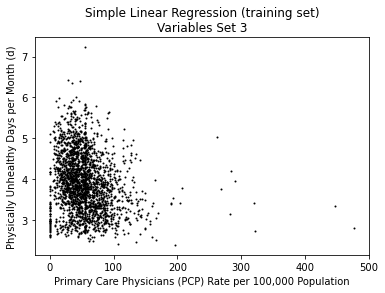

In [90]:
plt.scatter(x3_train[:,-3], y3_train, color='k', s=1)
plt.title('Simple Linear Regression (training set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (training set)_Variables Set 3_PCP.pdf')

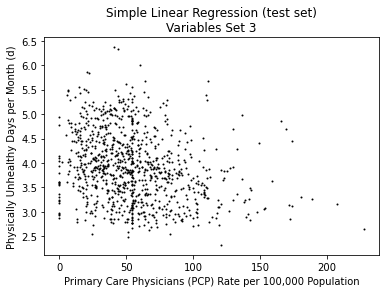

In [91]:
plt.scatter(x3_test[:,-3], y3_test, color='k', s=1)
plt.title('Simple Linear Regression (test set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Primary Care Physicians (PCP) Rate per 100,000 Population')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (test set)_Variables Set 3_PCP.pdf')

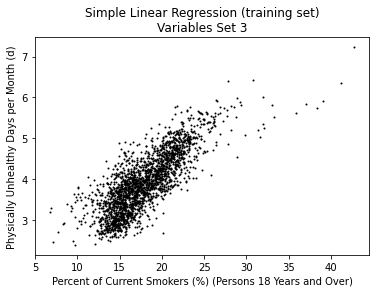

In [92]:
plt.scatter(x3_train[:,-2], y3_train, color='k', s=1)
plt.title('Simple Linear Regression (training set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Percent of Current Smokers (%) (Persons 18 Years and Over)')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (training set)_Variables Set 3_CurrentSmoker.pdf')

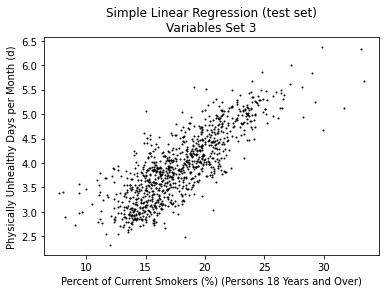

In [93]:
plt.scatter(x3_test[:,-2], y3_test, color='k', s=1)
plt.title('Simple Linear Regression (test set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Percent of Current Smokers (%) (Persons 18 Years and Over)')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (test set)_Variables Set 3_CurrentSmoker.pdf')

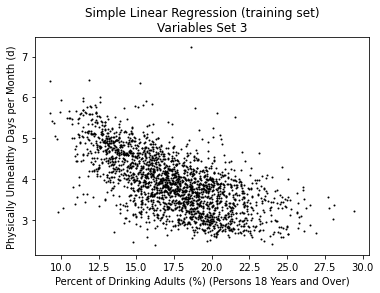

In [94]:
plt.scatter(x3_train[:,-1], y3_train, color='k', s=1)
plt.title('Simple Linear Regression (training set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Percent of Drinking Adults (%) (Persons 18 Years and Over)')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (training set)_Variables Set 3_DrinkingAdults.pdf')

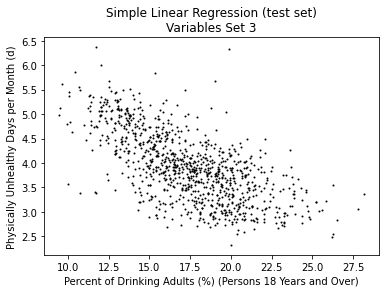

In [95]:
plt.scatter(x3_test[:,-1], y3_test, color='k', s=1)
plt.title('Simple Linear Regression (test set)\nVariables Set 3')
plt.ylabel('Physically Unhealthy Days per Month (d)')
plt.xlabel('Percent of Drinking Adults (%) (Persons 18 Years and Over)')
plt.savefig('/Users/chengfei/downloads/Simple Linear Regression (test set)_Variables Set 3_DrinkingAdults.pdf')

<h3> 3.3. Polynomial Regression </h3>

In [96]:
reg_poly3 = PolynomialFeatures(degree=3)
x3_poly_train = reg_poly3.fit_transform(x3_train)
x3_poly_test = reg_poly3.transform(x3_test)

In [97]:
regressor3_poly = LinearRegression()
regressor3_poly.fit(x3_poly_train, y3_train)

LinearRegression()

In [98]:
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'R2 (train set)'] = regressor3_poly.score(x3_poly_train, y3_train)
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'R2 (test set)'] = regressor3_poly.score(x3_poly_test, y3_test)
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
x3_poly_trial = reg_poly3.transform(x3_trial)
reg_results.loc[('VariablesSet3', 'PolynomialRegression'), 'y_predicted'] = regressor3_poly.predict(x3_poly_trial)[0,0]

<h3> 3.4. Support Vector Regression </h3>

In [99]:
scx3 = StandardScaler()
x3_sc_train = scx3.fit_transform(x3_train)
x3_sc_test = scx3.transform(x3_test)

scy3 = StandardScaler()
y3_sc_train = scy3.fit_transform(y3_train)
y3_sc_test = scy3.transform(y3_test)

<h5> 3.4.1. Use linear as the kernel. </h5>

In [100]:
regressor3_svm_linear = SVR(kernel='linear')
regressor3_svm_linear.fit(x3_sc_train, y3_sc_train.ravel())

SVR(kernel='linear')

In [101]:
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'R2 (train set)'] = regressor3_svm_linear.score(x3_sc_train, y3_sc_train)
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'R2 (test set)'] = regressor3_svm_linear.score(x3_sc_test, y3_sc_test)
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
x3_sc_trial = scx3.transform(x3_trial)
reg_results.loc[('VariablesSet3', 'SVR_linear'), 'y_predicted'] = scy3.inverse_transform(regressor3_svm_linear.predict(x3_sc_trial))[0]

<h5> 3.4.2. Use poly as the kernel. </h5>

In [102]:
regressor3_svm_poly = SVR(kernel='poly')
regressor3_svm_poly.fit(x3_sc_train, y3_sc_train.ravel())
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'R2 (train set)'] = regressor3_svm_poly.score(x3_sc_train, y3_sc_train)
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'R2 (test set)'] = regressor3_svm_poly.score(x3_sc_test, y3_sc_test)
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
x3_sc_trial = scx3.transform(x3_trial)
reg_results.loc[('VariablesSet3', 'SVR_poly'), 'y_predicted'] = scy3.inverse_transform(regressor3_svm_poly.predict(x3_sc_trial))[0]

<h5> 3.4.3. Use rbf as the kernel. </h5>

In [103]:
regressor3_svm_rbf = SVR(kernel='rbf')
regressor3_svm_rbf.fit(x3_sc_train, y3_sc_train.ravel())
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'R2 (train set)'] = regressor3_svm_rbf.score(x3_sc_train, y3_sc_train)
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'R2 (test set)'] = regressor3_svm_rbf.score(x3_sc_test, y3_sc_test)
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
x3_sc_trial = scx3.transform(x3_trial)
reg_results.loc[('VariablesSet3', 'SVR_rbf'), 'y_predicted'] = scy3.inverse_transform(regressor3_svm_rbf.predict(x3_sc_trial))[0]

<h3> 3.5. Decision Tree Regression </h3>

In [104]:
regressor3_tree = DecisionTreeRegressor(random_state=0)
regressor3_tree.fit(x3_train, y3_train)

DecisionTreeRegressor(random_state=0)

In [105]:
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'R2 (train set)'] = regressor3_tree.score(x3_train, y3_train)
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'R2 (test set)'] = regressor3_tree.score(x3_test, y3_test)
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
reg_results.loc[('VariablesSet3', 'DecisionTree'), 'y_predicted'] = regressor3_tree.predict(x3_trial)[0]

<h3> 3.6. Random Forest Regression </h3>

In [106]:
regressor3_forest = RandomForestRegressor(n_estimators=10, random_state=0)
regressor3_forest.fit(x3_train, y3_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

In [107]:
reg_results.loc[('VariablesSet3', 'RandomForest'), 'X'] = 'NV003_001, Metro status, T011_001, T011_002'
reg_results.loc[('VariablesSet3', 'RandomForest'), 'Y'] = 'T001_001'
reg_results.loc[('VariablesSet3', 'RandomForest'), 'R2 (train set)'] = regressor3_forest.score(x3_train, y3_train)
reg_results.loc[('VariablesSet3', 'RandomForest'), 'R2 (test set)'] = regressor3_forest.score(x3_test, y3_test)
reg_results.loc[('VariablesSet3', 'RandomForest'), 'x_trial'] = 41.50426, 'Suburb', 19.1246585, 16.87801512
reg_results.loc[('VariablesSet3', 'RandomForest'), 'y_actual'] = 4.20057798
x3_trial = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 41.50426, 19.1246585, 16.87801512]])
reg_results.loc[('VariablesSet3', 'RandomForest'), 'y_predicted'] = regressor3_forest.predict(x3_trial)[0]

In [108]:
reg_results.to_excel('/Users/chengfei/downloads/ModelPerformance.xlsx')

In [109]:
reg_results

X  \
VariablesSet1 SimpleLinearRegression                                      NV003_001   
              MultipleLinearRegression                                    NV003_001   
              PolynomialRegression                                        NV003_001   
              SVR_linear                                                  NV003_001   
              SVR_poly                                                    NV003_001   
              SVR_rbf                                                     NV003_001   
              DecisionTree                                                NV003_001   
              RandomForest                                                NV003_001   
VariablesSet2 SimpleLinearRegression                        NV003_001, Metro status   
              MultipleLinearRegression                      NV003_001, Metro status   
              PolynomialRegression                          NV003_001, Metro status   
              SVR_linear                                    NV003_001, Metro status   
              SVR_poly                                      NV003_001, Metro status   
              SVR_rbf                                       NV003_001, Metro status   
              DecisionTree                                  NV003_001, Metro status   
              RandomForest                                  NV003_001, Metro status   
VariablesSet3 SimpleLinearRegression    NV003_001, Metro status, T011_001, T011_002   
              MultipleLinearRegression  NV003_001, Metro status, T011_001, T011_002   
              PolynomialRegression      NV003_001, Metro status, T011_001, T011_002   
              SVR_linear                NV003_001, Metro status, T011_001, T011_002   
              SVR_poly                  NV003_001, Metro status, T011_001, T011_002   
              SVR_rbf                   NV003_001, Metro status, T011_001, T011_002   
              DecisionTree              NV003_001, Metro status, T011_001, T011_002   
              RandomForest              NV003_001, Metro status, T011_001, T011_002   

                                               Y R2 (train set) R2 (test set)  \
VariablesSet1 SimpleLinearRegression    T001_001      0.0570096     0.0301113   
              MultipleLinearRegression  T001_001            NaN           NaN   
              PolynomialRegression      T001_001      0.0705198      -1.10304   
              SVR_linear                T001_001      0.0491035      0.021093   
              SVR_poly                  T001_001     -0.0147609     -0.877059   
              SVR_rbf                   T001_001      0.0857738     0.0666474   
              DecisionTree              T001_001       0.924274     -0.821607   
              RandomForest              T001_001       0.715889     -0.422976   
VariablesSet2 SimpleLinearRegression    T001_001            NaN           NaN   
              MultipleLinearRegression  T001_001      0.0637472     0.0782615   
              PolynomialRegression      T001_001      0.0758614      0.085037   
              SVR_linear                T001_001      0.0569644     0.0755309   
              SVR_poly                  T001_001      0.0682448     0.0797543   
              SVR_rbf                   T001_001       0.106054     0.0896885   
              DecisionTree              T001_001       0.916956     -0.754729   
              RandomForest              T001_001       0.729179         -0.26   
VariablesSet3 SimpleLinearRegression    T001_001            NaN           NaN   
              MultipleLinearRegression  T001_001       0.760185      0.762105   
              PolynomialRegression      T001_001       0.783795      0.764438   
              SVR_linear                T001_001       0.758977       0.76008   
              SVR_poly                  T001_001       0.781034      0.758517   
              SVR_rbf                   T001_001       0.791384       0.76081   
              DecisionTree              T00